# SRB moments distributions dataset
Notebook for collection and analysis of identified SRB events.

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/preprocessed/'
dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions')

dfratclean = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
dfratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')

In [2]:
df = pd.merge(dfratv, dfevent, on=['Frame', 'session_id','Time'])
df['subU'] = df['speed'] - df['U'] 
df['subUM'] = df['speed'] - df['UM'] 

## Experiment 2

In [3]:
dfSRB2 = pd.DataFrame()
dd2 = df[df['session_id']==2]

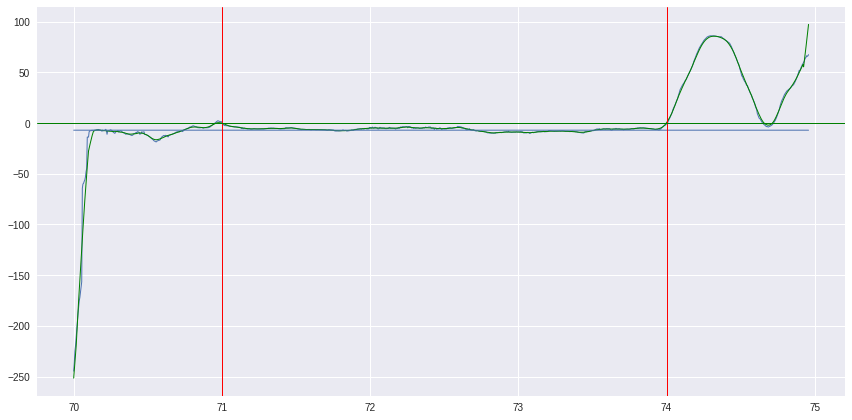

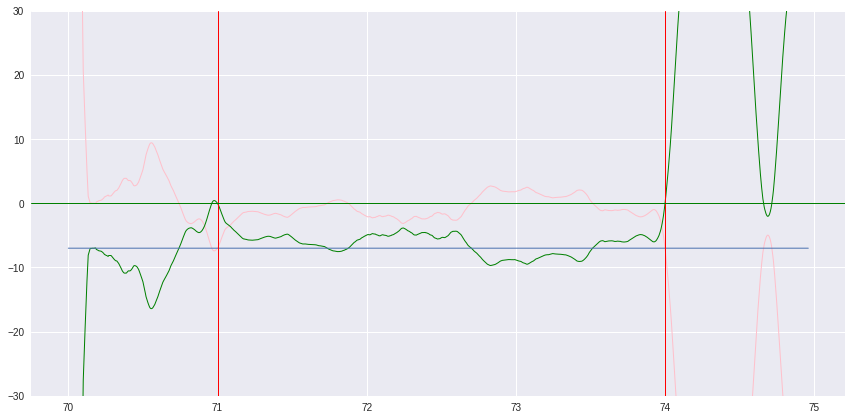

In [4]:
#  71, 73
dpart = dd2[(dd2['Time']>70) & (dd2['Time']<75)]
xmin, xmax = 71, 74

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,30])
# g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subUM", alpha=1, linewidth=1, color='pink');
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [5]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

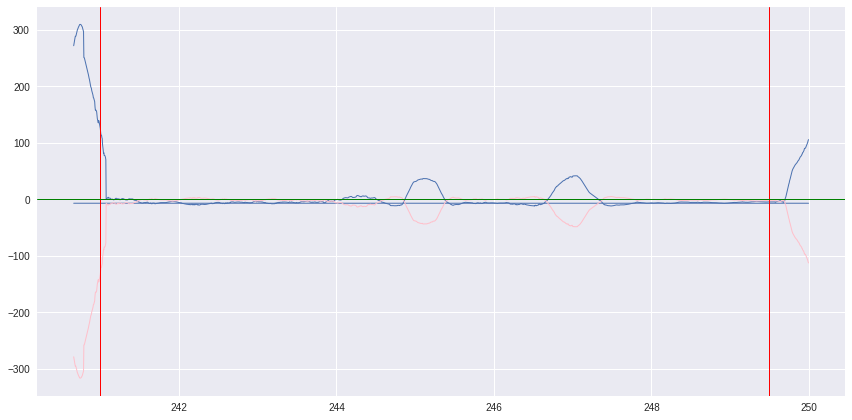

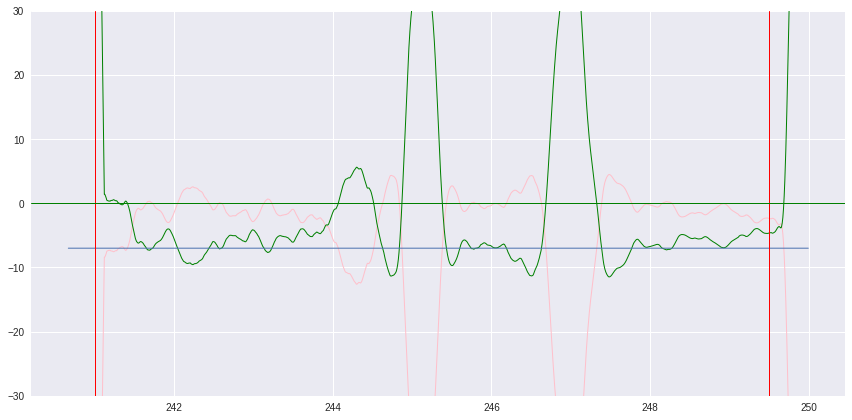

In [6]:

## 247, 249
dpart = dd2[(dd2['Time']>240) & (dd2['Time']<250)]
xmin, xmax = 241, 249.5

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,30])
# g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subUM", alpha=1, linewidth=1, color='pink');
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [7]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

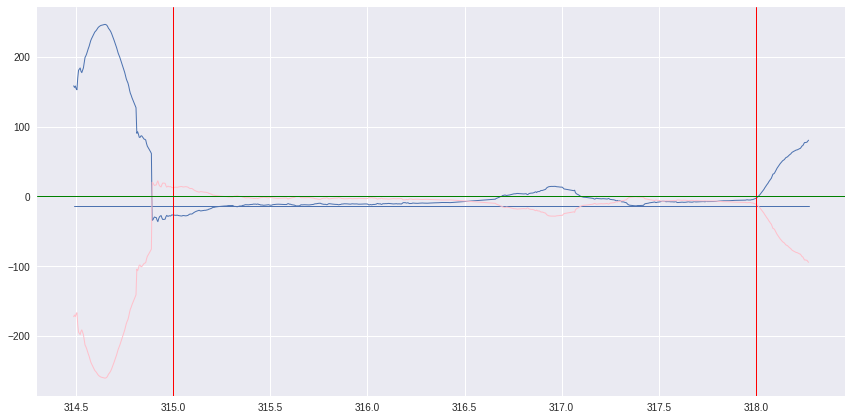

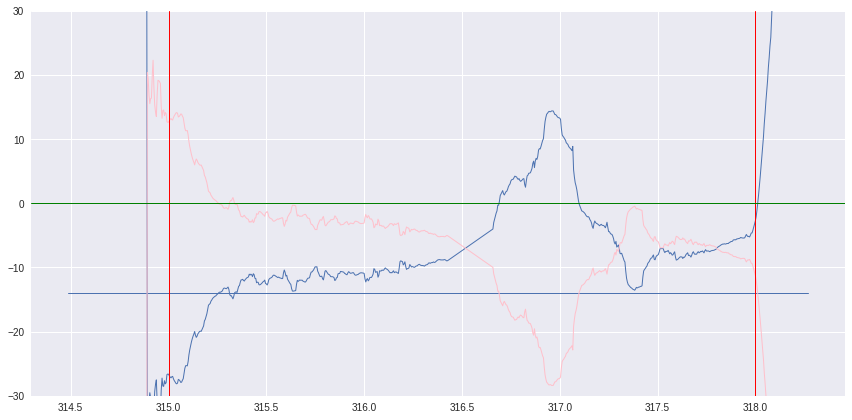

In [8]:
## 315, 317
dpart = dd2[(dd2['Time']>313) & (dd2['Time']<320)]
xmin, xmax = 315, 318

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [9]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

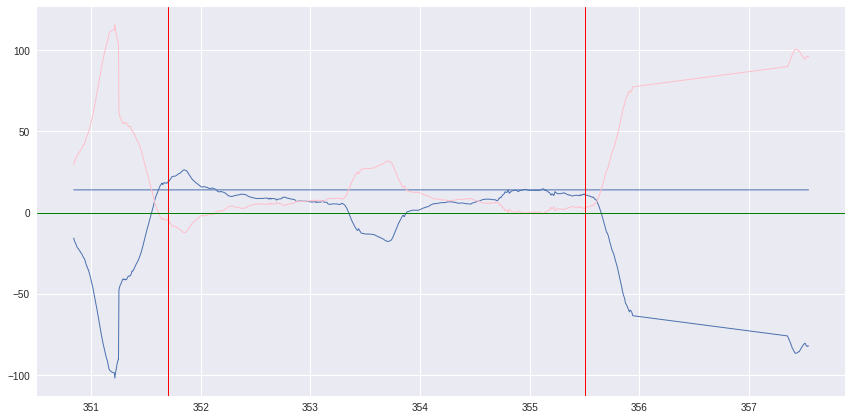

In [10]:
## 351, 356
dpart = dd2[(dd2['Time']>350) & (dd2['Time']<358)]
xmin, xmax = 351.7, 355.5

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [11]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

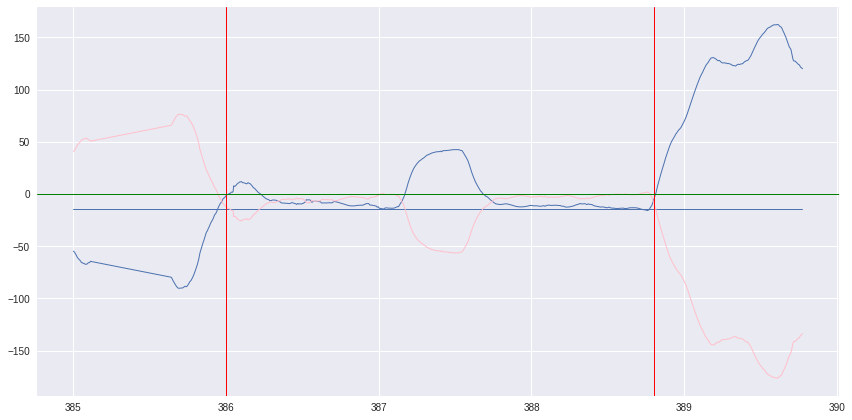

In [12]:
## 386, 388
dpart = dd2[(dd2['Time']>385) & (dd2['Time']<390)]
xmin, xmax = 386, 388.8

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [13]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

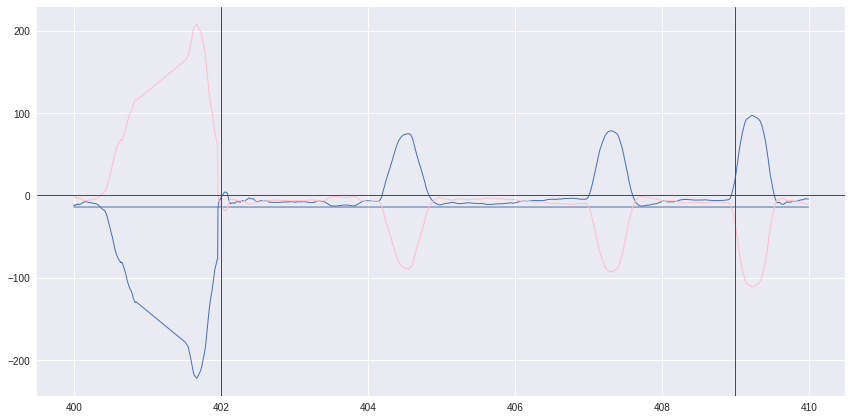

In [14]:
## 402, 407
dpart = dd2[(dd2['Time']>400) & (dd2['Time']<410)]
xmin, xmax = 402, 409

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [15]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

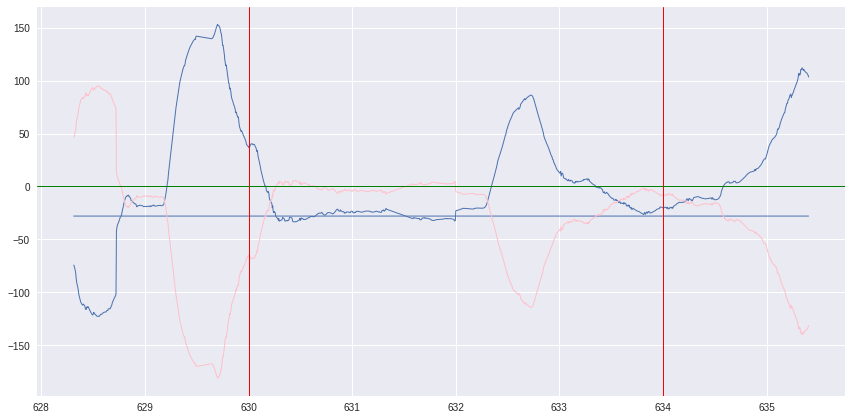

In [16]:
## 630, 632, 633, 634
dpart = dd2[(dd2['Time']>628) & (dd2['Time']<636)]
xmin, xmax = 630, 634

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [17]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

## Experiment 4

In [18]:
dfSRB4 = pd.DataFrame()
dd4 = df[df['session_id']==4]

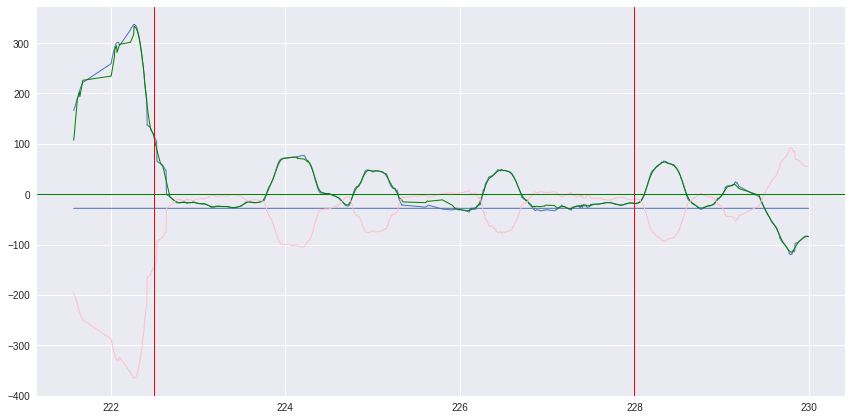

In [19]:
# 221, 228
dpart = dd4[(dd4['Time']>219) & (dd4['Time']<230)]
xmin, xmax = 222.5, 228

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [20]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

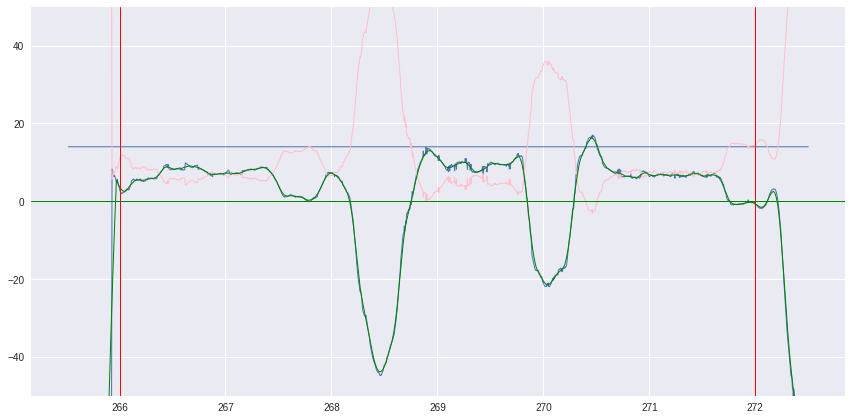

In [21]:
# 267, 270
dpart = dd4[(dd4['Time']>265) & (dd4['Time']<275)]
xmin, xmax = 266, 272

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-50,50])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');

g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [22]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

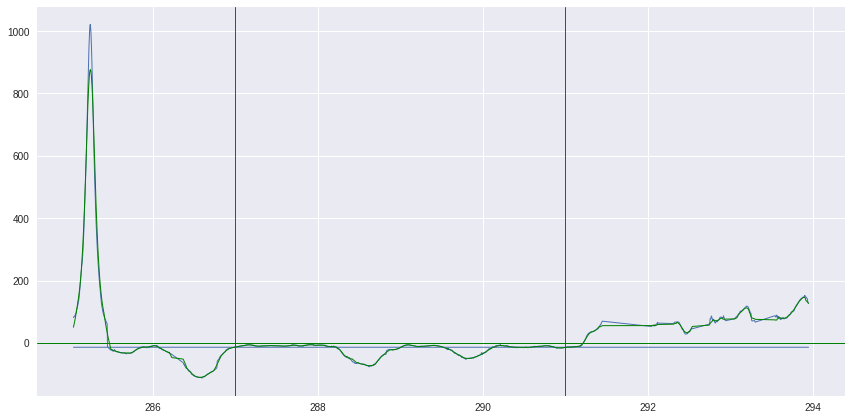

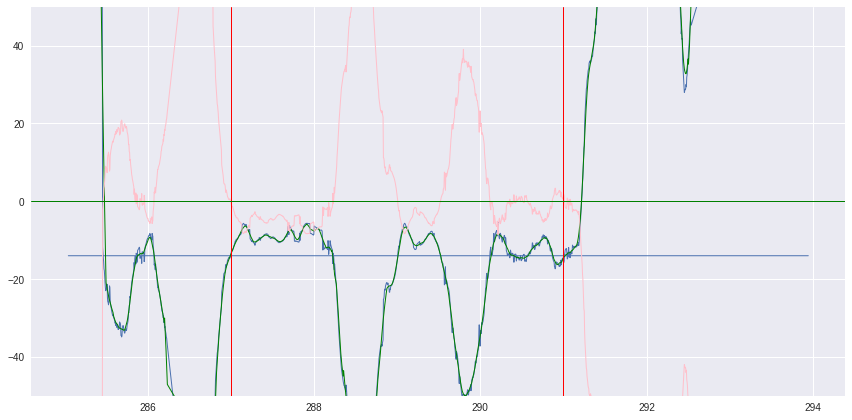

In [23]:
# 287, 291
dpart = dd4[(dd4['Time']>285) & (dd4['Time']<295)]
xmin, xmax = 287, 291

g = sns.FacetGrid(data=dpart, size=6, aspect=2)
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-50,50])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');

g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [24]:
 dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

## Experiment 5

In [25]:
dfSRB5 = pd.DataFrame()
dd5 = df[df['session_id']==5]

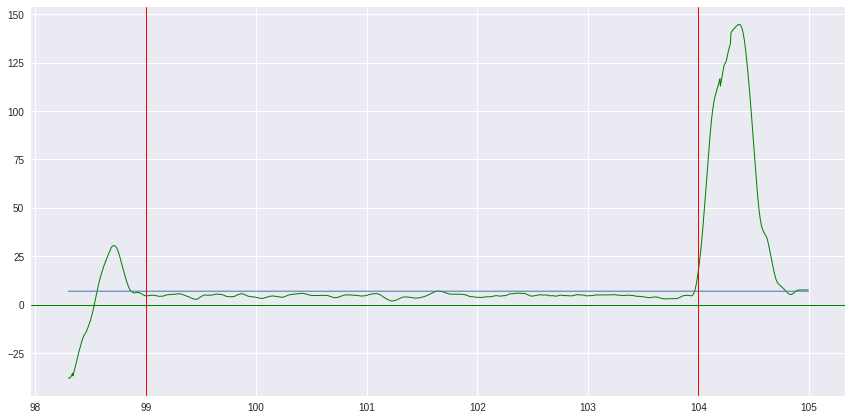

In [26]:
#  99, 104
dpart = dd5[(dd5['Time']>98) & (dd5['Time']<105)]
xmin, xmax = 99, 104

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [27]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

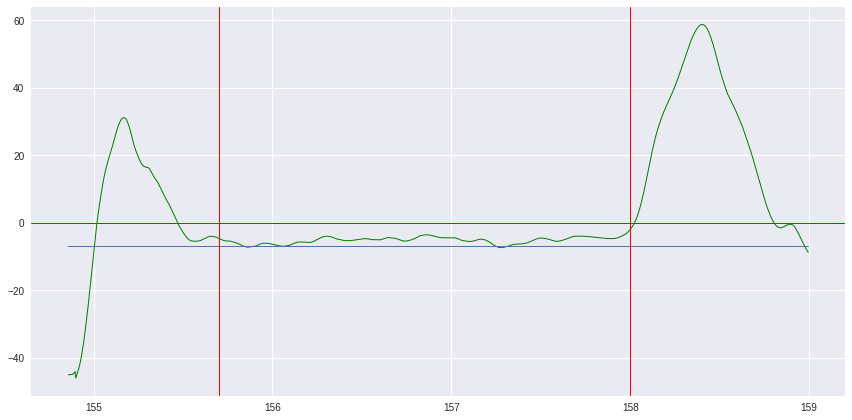

In [28]:
# 155, 157
dpart = dd5[(dd5['Time']>153) & (dd5['Time']<159)]
xmin, xmax = 155.7, 158

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [29]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

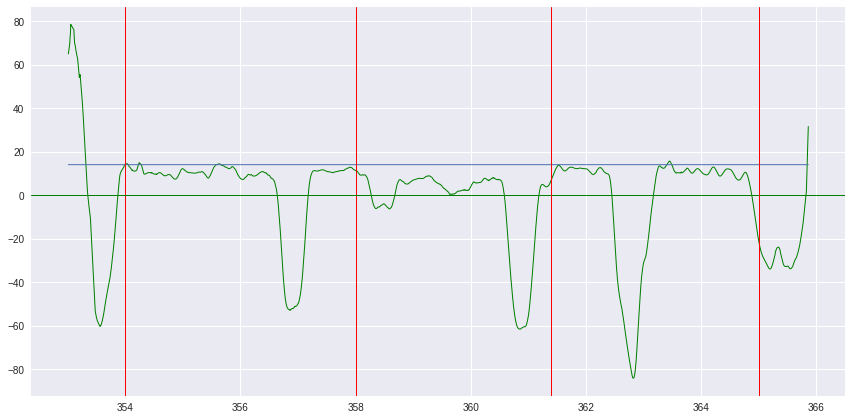

In [30]:
# 355, 365
dpart = dd5[(dd5['Time']>353) & (dd5['Time']<368)]
xmin, xmax = 354, 358

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

xmin, xmax = 361.4, 365
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');

dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

## Experiments combined - visualization

In [31]:
dfSRB = pd.DataFrame()
dfSRB = pd.concat([dfSRB, dfSRB2], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB4], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB5], axis=0, ignore_index=True)

In [32]:
dfSRB.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,...,lz2,clockwise,theta,U,UM,MotiveExpTimeSecs,visible,speed,subU,subUM
0,17040,71.000005,0.072119,0.095565,-0.039355,0.944235,-0.250821,-0.210601,2,0.004167,...,-0.217616,1,0.000075,1.036150,-0.034399,59.129167,1,-7.0,-8.036150,-6.965601
1,17041,71.004171,0.072115,0.095544,-0.039322,0.943951,-0.252116,-0.210527,2,0.004166,...,-0.217690,-1,0.000011,-0.154398,-0.207369,59.129167,1,-7.0,-6.845602,-6.792631
2,17042,71.008338,0.072112,0.095525,-0.039288,0.943682,-0.253362,-0.210415,2,0.004167,...,-0.217679,-1,0.000052,-0.713650,-0.410316,59.129167,1,-7.0,-6.286350,-6.589684
3,17043,71.012505,0.072118,0.095513,-0.039262,0.943516,-0.254264,-0.210240,2,0.004167,...,-0.217628,-1,0.000139,-1.916930,-0.647719,59.129167,1,-7.0,-5.083070,-6.352281
4,17044,71.016671,0.072128,0.095504,-0.039234,0.943379,-0.255043,-0.210044,2,0.004166,...,-0.217492,-1,0.000167,-2.297292,-0.910587,59.129167,1,-7.0,-4.702708,-6.089413


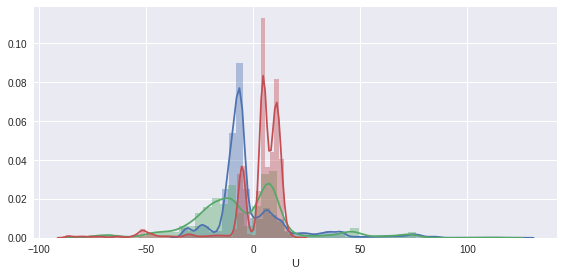

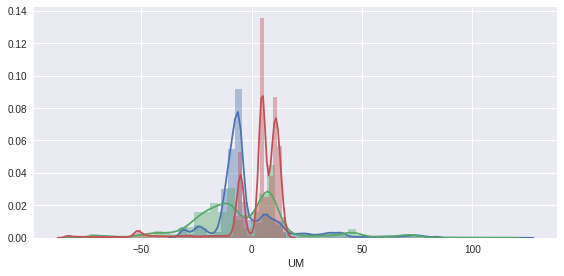

In [33]:
g = sns.FacetGrid(hue='session_id', data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'U');

g = sns.FacetGrid(hue='session_id', data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'UM');

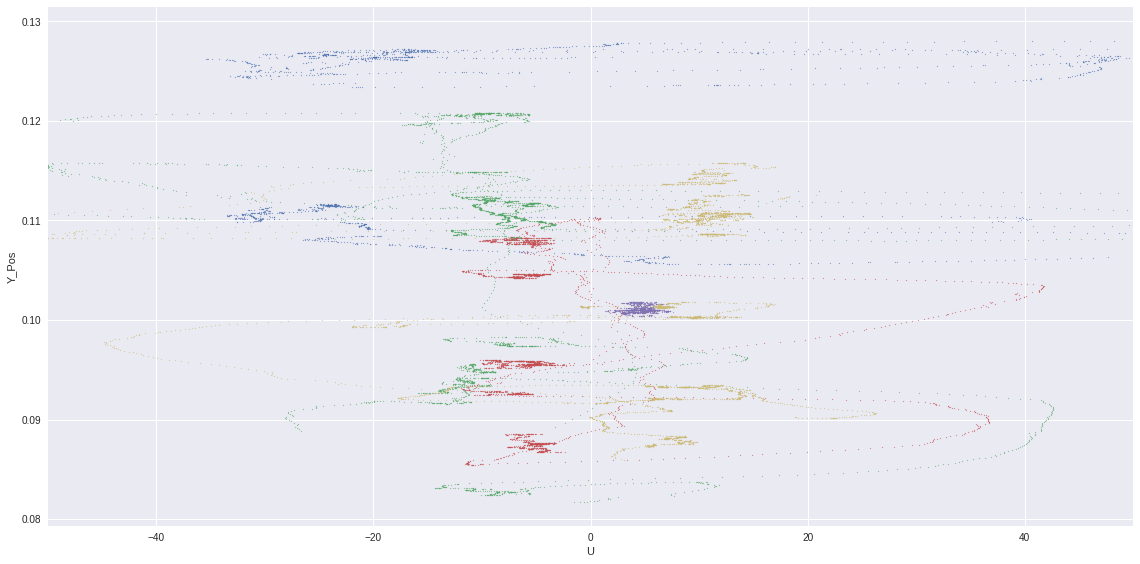

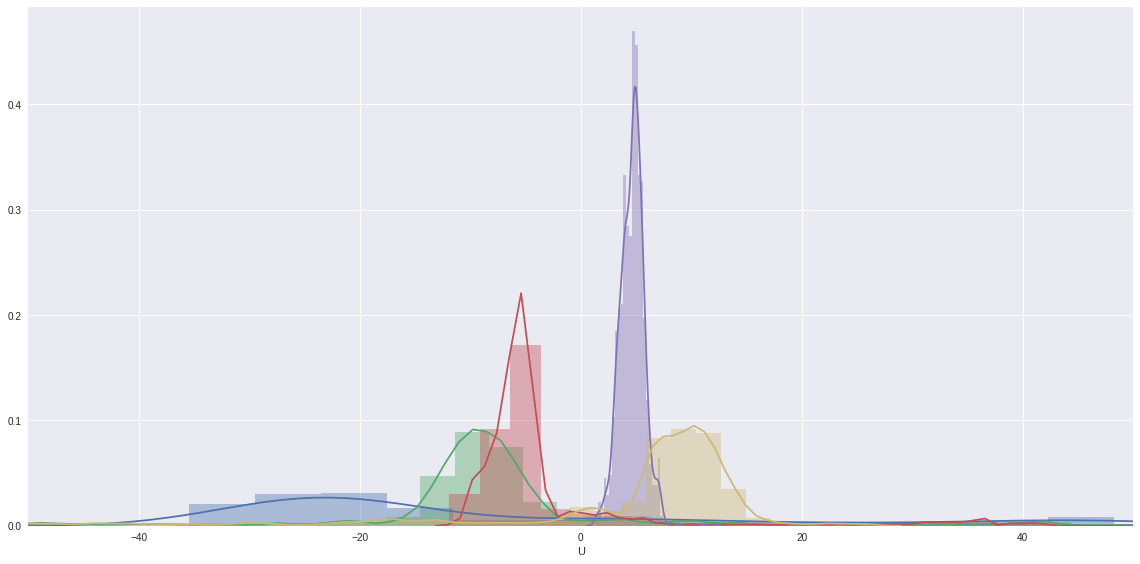

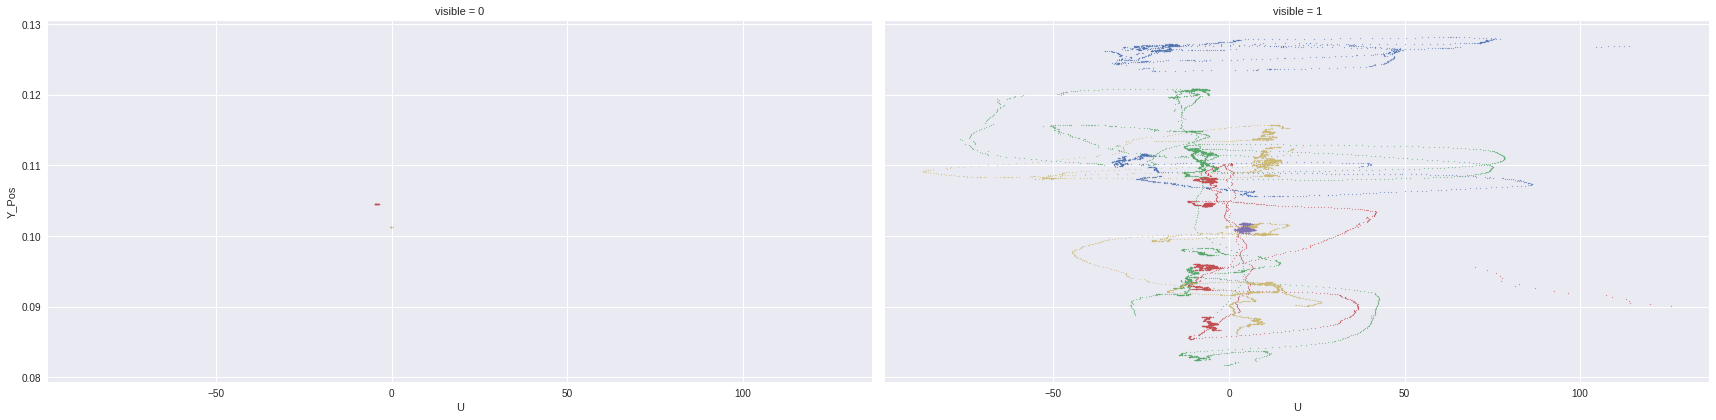

In [49]:
g = sns.FacetGrid( data=dfSRB, size=8, aspect=2, xlim=[-50,50], hue='speed')
g.map(plt.scatter,'U', "Y_Pos", alpha=0.5, s=1);

g = sns.FacetGrid( data=dfSRB, size=8, aspect=2, xlim=[-50,50], hue='speed')
g.map(sns.distplot, 'U');

g = sns.FacetGrid( data=dfSRB, size=6, aspect=2, col='visible', hue='speed')
g.map(plt.scatter,'U', "Y_Pos", alpha=0.5, s=1);

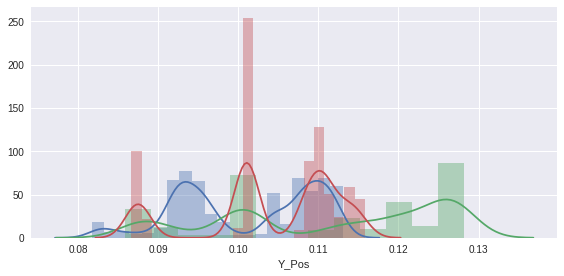

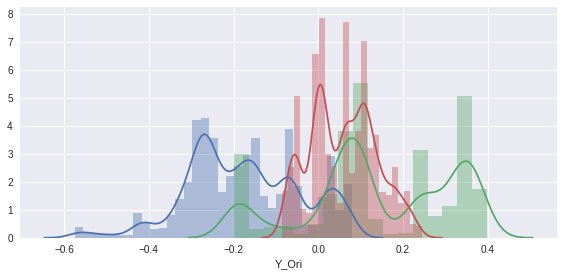

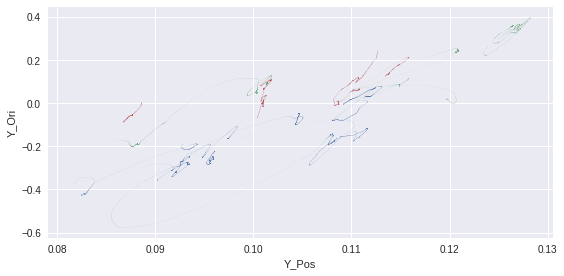

In [38]:
# postiion distribution visualization 
g = sns.FacetGrid(hue='session_id', data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

# oritentation distribution visualization 
g = sns.FacetGrid(hue='session_id', data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');

# scatter between orientation and position
g = sns.FacetGrid( data=dfSRB, size=4, aspect=2, hue='session_id')
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

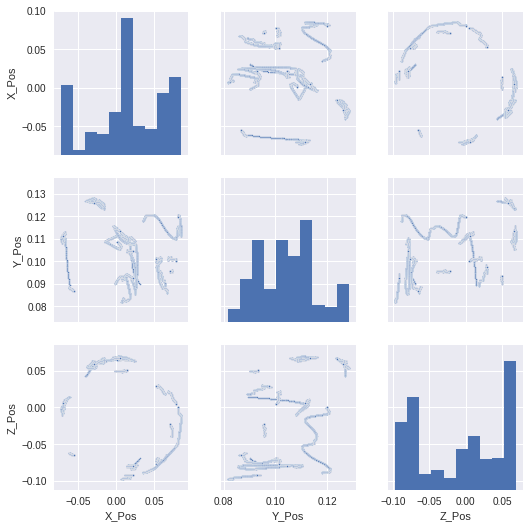

In [36]:
sns.pairplot(dfSRB, vars=['X_Pos', 'Y_Pos', 'Z_Pos'], plot_kws={"s": 3});

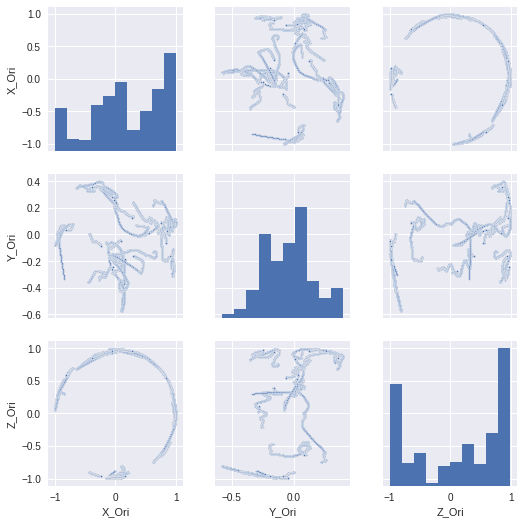

In [37]:
sns.pairplot(dfSRB, vars=['X_Ori', 'Y_Ori', 'Z_Ori'], plot_kws={"s": 3});